In [8]:
import sys
sys.path.append("../../")
import numpy as np

from src.basis import HamiltonianTemplate
from src.hamiltonian import ConversionGainHamiltonian, SnailEffectiveHamiltonian
from src.cost_function import BasicCost
from src.optimizer import TemplateOptimizer
from src.sampler import GateSample
from src.utils.custom_gates import BerkeleyGate, RiSwapGate
from src.utils.visualize import optimizer_training_plot

0.0
[-3.999999910959329]


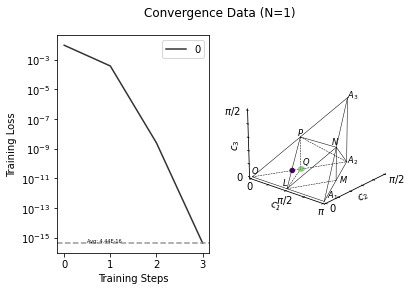

In [13]:
h = SnailEffectiveHamiltonian()
#h = ConversionGainHamiltonian()
basis = HamiltonianTemplate(h=h)
objective = BasicCost()
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)
sampler = GateSample(RiSwapGate(1/2))
#sampler = GateSample(BerkeleyGate())
ret = optimizer.approximate_from_distribution(sampler=sampler)
optimizer_training_plot(*ret);

ret = optimizer.approximate_target_U(sampler._get_unitary())
print(ret.loss_result)

print([1/(el/np.pi) for el in ret.Xk])

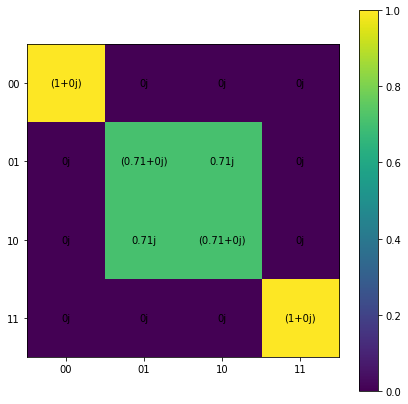

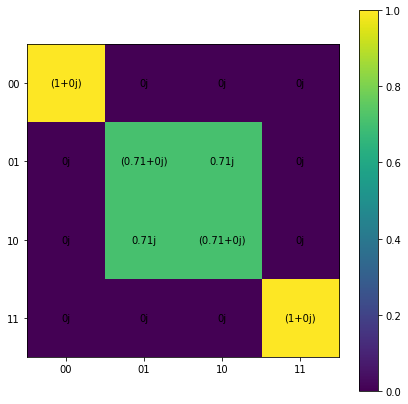

In [14]:
from src.utils.visualize import plotMatrix
u = h._construct_U_lambda(*ret.Xk)(1).full()
plotMatrix(u)

2.2390977960640157e-12
[1.043137238416791, 0.34771262164041217, 1.1293808018306377]


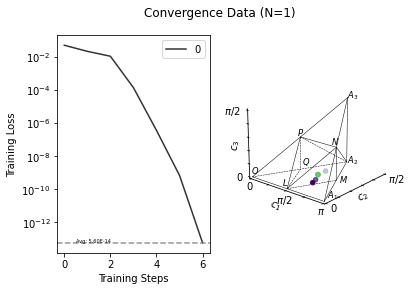

In [4]:
h = ConversionGainHamiltonian()
basis = HamiltonianTemplate(h=h)
objective = BasicCost()
optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)
sampler = GateSample(BerkeleyGate())

ret = optimizer.approximate_from_distribution(sampler=sampler)
optimizer_training_plot(*ret);

ret = optimizer.approximate_target_U(sampler._get_unitary())
print(ret.loss_result)

from numpy import pi
print([el for el in ret.Xk])

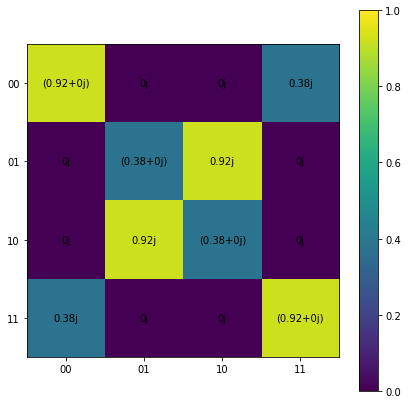

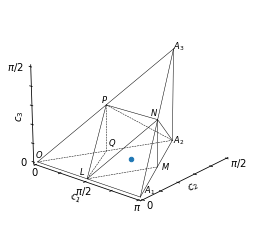

In [11]:
from src.utils.custom_gates import CustomCostGate
from src.hamiltonian import ConversionGainHamiltonian
from src.utils.polytope_wrap import gate_set_to_haar_expectation
import numpy as np
from src.utils.visualize import plotMatrix
h = ConversionGainHamiltonian()
gc, gg, t = [0.39536342562579196*np.pi, 0.1317854473495699*np.pi, 0.301915713619202*np.pi]
gc, gg, t = [2*np.pi/8, np.pi/8, 1]
u = h._construct_U_lambda(gc, gg)(t).full()
plotMatrix(u)
# u = CustomCostGate(u, f"B({i*np.pi/8, j*np.pi/8})", cost=1)
# gate_set_to_haar_expectation(u, chatty=True)
from src.utils.visualize import unitary_to_weyl
unitary_to_weyl(u)

In [8]:
# from hamiltonian import Simul1QGatesHamiltonian
# h = Simul1QGatesHamiltonian()
# basis = HamiltonianTemplate(h=h)
# objective = BasicCost()
# optimizer = TemplateOptimizer(basis=basis, objective=objective, use_callback=True)
# sampler = GateSample(BerkeleyGate())
# ret = optimizer.approximate_from_distribution(sampler=sampler)
# optimizer_training_plot(*ret);
# ret = optimizer.approximate_target_U(sampler._get_unitary())
# print(ret.loss_result)
# from numpy import pi
# print([el/pi for el in ret.Xk])